In [1]:
import os
os.sys.path.append('F:\Installed Softwares\Anaconda\envs\opencv-env\Lib\site-packages')
import cv2
import shutil
import glob
import vmmr_utils
import matplotlib.pyplot as plt
%matplotlib inline

Creating  honda_civic_1998
Creating  honda_accord_1997
Creating  nissan_altima_2014
Creating  toyota_corolla_2013


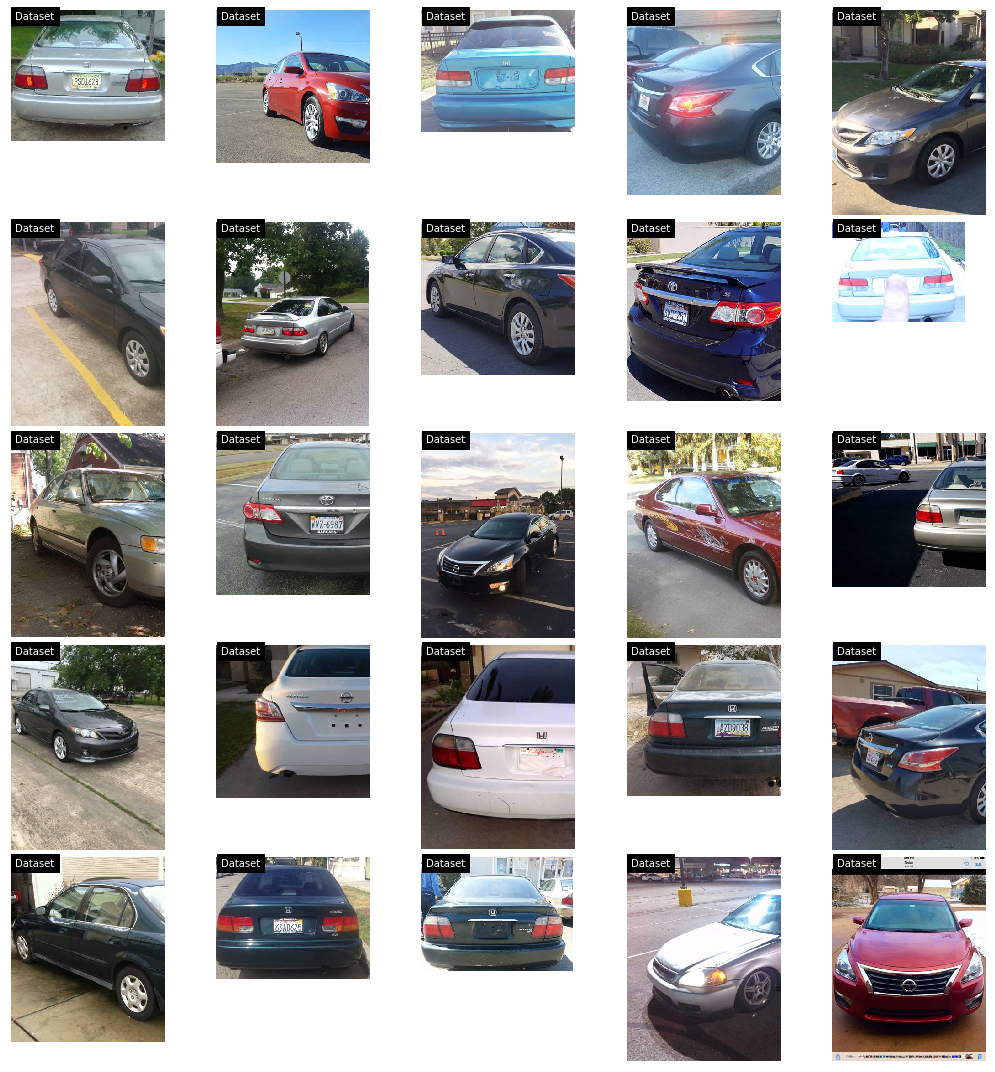

In [2]:
cars={
 "honda_civic_1998": ["honda_civic_1997", "honda_civic_1998"], # available "honda_civic_1999"
    "honda_accord_1997": ["honda_accord_1996", "honda_accord_1997"],
    #"ford_f150_2006": ["ford_f150_2005", "ford_f150_2006", "ford_f150_2007"],
    #"chevrolet_silverado_2004": ["chevrolet_silverado_2003", "chevrolet_silverado_2004"], # available "chevrolet_silverado_2005"
    #"toyota_camry_2014": ["toyota_camry_2012", "toyota_camry_2013", "toyota_camry_2014", "toyota_camry_le_2012", "toyota_camry_le_2013", "toyota_camry_le_2014", "toyota_camry_se_2012", "toyota_camry_se_2013", "toyota_camry_xle_2012", "toyota_camry_xle_2013"],
    "nissan_altima_2014": ["nissan_altima_2013", "nissan_altima_2014", "nissan_altima_2015"],
    "toyota_corolla_2013": ["toyota_corolla_2011", "toyota_corolla_2012", "toyota_corolla_2013", "toyota_corolla_ce_2012", "toyota_corolla_le_2012", "toyota_corolla_le_2013", "toyota_corolla_s_2011", "toyota_corolla_s_2012"],
    #"dodge_ram_2001": ["dodge_ram_1500_2000", "dodge_ram_1500_2001", "dodge_ram_1500_1999", "dodge_ram_1500_1998", "dodge_ram_1500_1997", "dodge_ram_1500_1996", "dodge_ram_1500_1995"],
    #"gmc_sierra_2012": ["gmc_sierra_1500_2007", "gmc_sierra_1500_2008", "gmc_sierra_1500_2009", "gmc_sierra_1500_2010", "gmc_sierra_1500_2011", "gmc_sierra_1500_2012", "gmc_sierra_1500_2013", "gmc_sierra_2500_2007", "gmc_sierra_2500_2008", "gmc_sierra_2500_2009", "gmc_sierra_2500_2010", "gmc_sierra_2500_2011", "gmc_sierra_2500_2012", "gmc_sierra_2500_2013"],
    #"chevrolet_impala_2008": ["chevrolet_impala_2007", "chevrolet_impala_2008", "chevrolet_impala_2009"]
}

full_dataset_path="../Dataset/SubsetVMMR"
stolen_dataset_path="../Dataset/Most_Stolen_Cars"

if os.path.exists(stolen_dataset_path):
    shutil.rmtree(stolen_dataset_path)
else:
    os.makedirs(stolen_dataset_path)
    
for dirt,car_list in cars.items():
    print("Creating ",dirt)
    os.makedirs(os.path.join(stolen_dataset_path,dirt))
    for car in car_list:
        files = glob.glob((os.path.join(full_dataset_path,car,"")+'*.jpg'))
        for file in files:
            shutil.copy(file,os.path.join(stolen_dataset_path,dirt))
vmmr_utils.display_images(stolen_dataset_path)

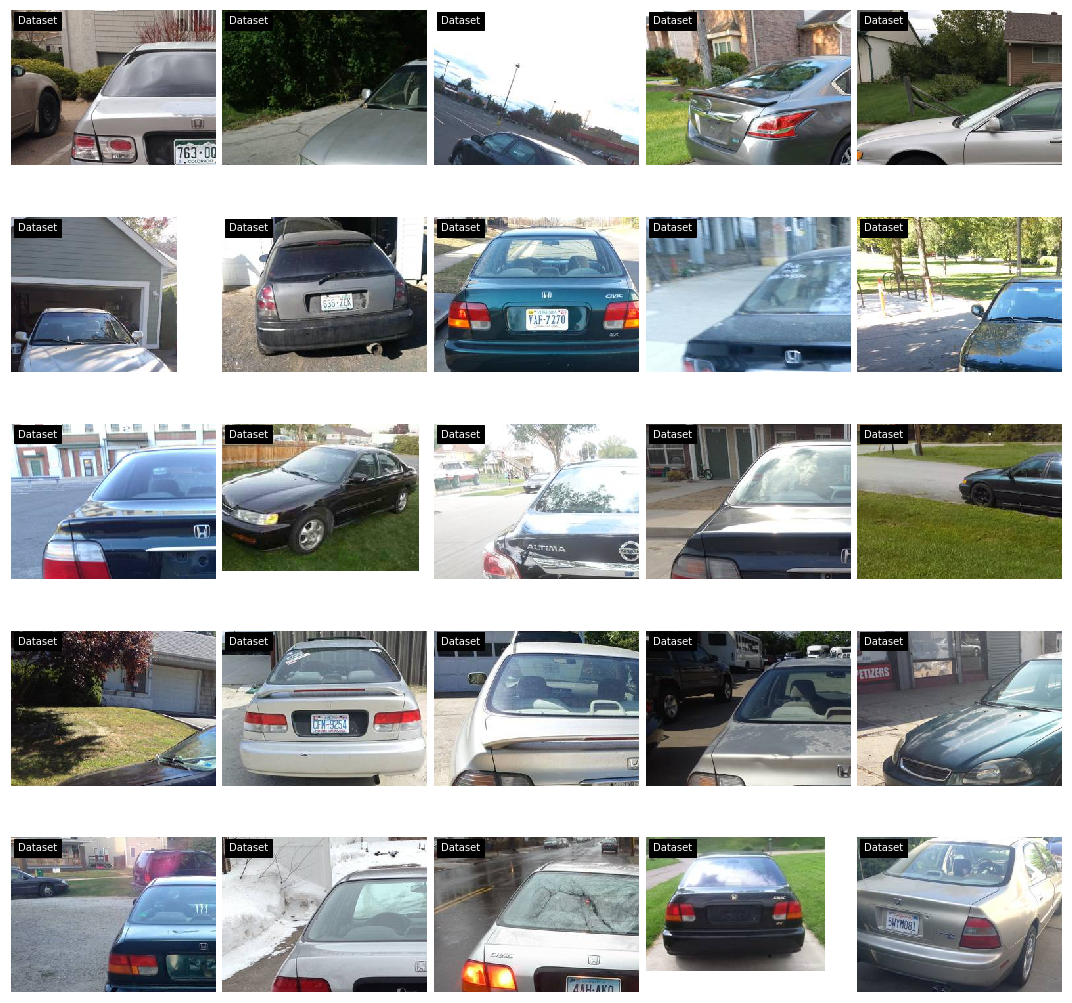

In [3]:
from multiprocessing import Pool
if __name__=='__main__':
    pool=Pool()
    image_list=glob.glob(stolen_dataset_path+"/*/*")
    pool.map(vmmr_utils.check_image,image_list)
    pool.close
vmmr_utils.display_images(stolen_dataset_path)

In [4]:
import pygal 
from IPython.display import display, HTML
#Create function to display interactive plotting
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))
    
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Stolen Car Class Distribution'
for o in os.listdir(stolen_dataset_path):
    line_chart.add(o, len(os.listdir(os.path.join(stolen_dataset_path, o))))
galplot(line_chart)

In [5]:
import math
import sys

train_val_test=(.7,.1,.2)
test_folder='../Dataset/test/'
train_folder='../Dataset/train/'
val_folder='../Dataset/val/'

file_names=os.listdir('../Dataset/Most_Stolen_cars')

for folder in [test_folder,train_folder,val_folder]:
    if os.path.exists(folder) and os.path.isdir(folder):
        shutil.rmtree(folder)

for category in file_names:
    os.makedirs(test_folder+category)
    os.makedirs(train_folder+category)
    os.makedirs(val_folder+category)
    
for idx, category in enumerate(file_names):
    file_list = os.listdir(stolen_dataset_path+'/'+category)
    train_ratio = math.floor(len(file_list) * train_val_test[0])
    val_ratio = math.floor(len(file_list)*train_val_test[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = file_list[train_ratio + val_ratio:]
    
    for i, file in enumerate(train_list):
        shutil.copy(stolen_dataset_path+'/'+category+'/'+file, train_folder+'/'+category+'/'+file)
    sys.stdout.write('Moving %s train images to category folder %s' % (len(train_list), category))  
    sys.stdout.write('\n')
    for i, file in enumerate(val_list):
        shutil.copy(stolen_dataset_path+'/'+category+'/'+file,val_folder+'/'+category+'/'+file)
    sys.stdout.write('Moving %s val images to category folder %s' % (len(val_list), category))  
    sys.stdout.write('\n')
    for i, file in enumerate(test_list):
        shutil.copy(stolen_dataset_path+'/'+category+'/'+file,test_folder+'/'+category+'/'+file)
    sys.stdout.write('Moving %s test images to category folder %s' % (len(test_list), category))  
    sys.stdout.write('\n')
print('Done')

Moving 452 train images to category folder honda_accord_1997
Moving 64 val images to category folder honda_accord_1997
Moving 131 test images to category folder honda_accord_1997
Moving 568 train images to category folder honda_civic_1998
Moving 81 val images to category folder honda_civic_1998
Moving 163 test images to category folder honda_civic_1998
Moving 239 train images to category folder nissan_altima_2014
Moving 34 val images to category folder nissan_altima_2014
Moving 69 test images to category folder nissan_altima_2014
Moving 199 train images to category folder toyota_corolla_2013
Moving 28 val images to category folder toyota_corolla_2013
Moving 58 test images to category folder toyota_corolla_2013
Done


In [10]:
import random
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array, load_img

In [17]:
datgen = ImageDataGenerator(rotation_range=45,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.3,
                            vertical_flip=True,
                            horizontal_flip=True,
                            fill_mode="nearest")

Text(0.5,1,'Original Dataset')

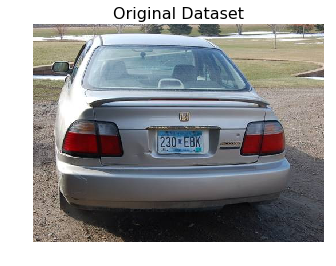

In [45]:
file_list = glob.glob("../Dataset/test/*/*")
img_path = random.choice(file_list)
img = load_img(img_path)
car_class = img_path.split("/")[1]
plt.imshow(img)
plt.axis("off")
plt.title("Original " + car_class, fontsize=16)

In [46]:
img = img_to_array(img)
img = img.reshape((1,)+ img.shape)


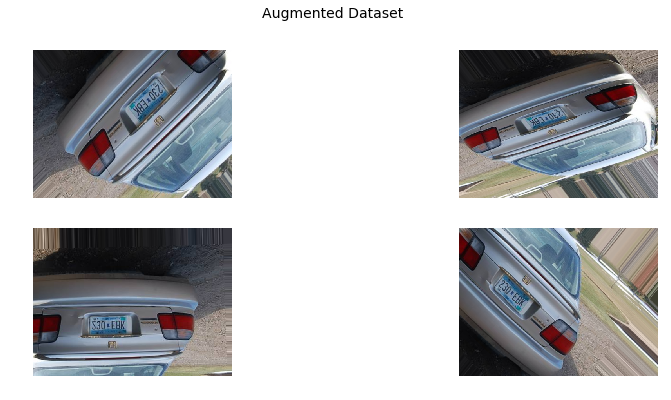

In [47]:
n_augmentation=4
plt.figure(figsize=(14,6))
i = 0 
for batch in datgen.flow(img, batch_size=1, seed=21):
    plt.subplot(2,int(np.ceil(n_augmentation*1./2)),i+1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented Dataset",fontsize=14)
    i+=1
    if i>=n_augmentation:
        break

In [50]:
def data_augment(data_dir):
    list_of_images = os.listdir(data_dir)
    datagen = ImageDataGenerator(rotation_range = 45, horizontal_flip=True, fill_mode = "nearest")
    for img_name in list_of_images:
        tmp_img_name = os.path.join(data_dir,img_name)
        img = load_img(tmp_img_name)
        img = img_to_array(img)
        img = img.reshape((1,)+img.shape)
        
        batch = datagen.flow(img,batch_size=1,seed=21,save_to_dir=data_dir,save_prefix=img_name.split(".jpg")[0] + "augmented",save_format="jpg")
        batch.next()

In [51]:
classes_to_augment = ["nissan_altima_2014","toyota_corolla_2013"]
for class_names in classes_to_augment:
    print("Currently augmented ",class_names)
    data_dir = os.path.join(train_folder,class_names)
    data_augment(data_dir)

Currently augmented  nissan_altima_2014
Currently augmented  toyota_corolla_2013


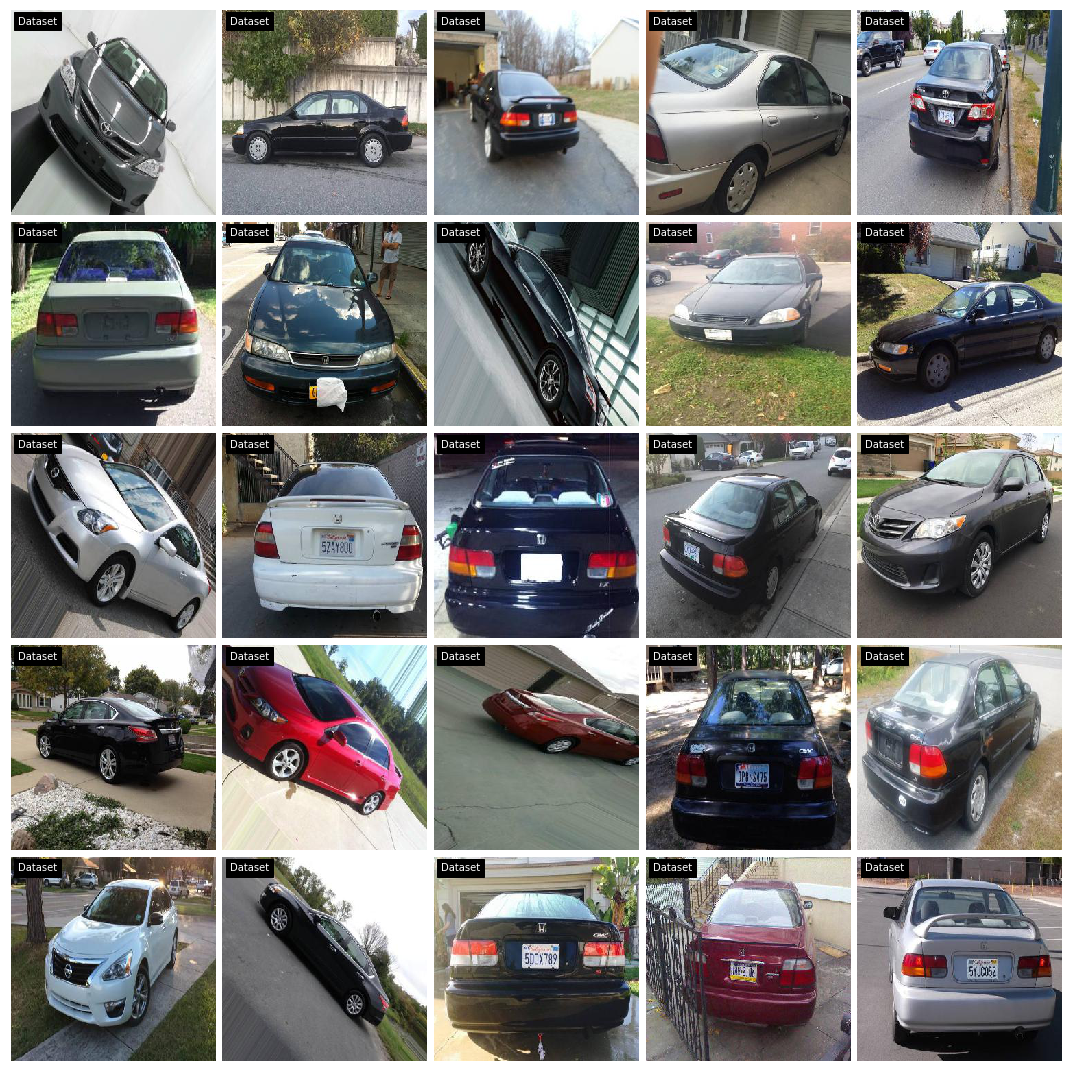

In [52]:
from functools import partial

if __name__ == '__main__':
    pool = Pool()
    image_list = glob.glob(train_folder + "/*/*")
    func = partial(vmmr_utils.resize_image, size=299)
    pool.map(func, image_list)
    pool.close()

vmmr_utils.display_images(train_folder)

In [55]:
line_chart = pygal.Bar(height=300)
line_chart.title="Most Stolen Car"
for o in os.listdir(train_folder):
    line_chart.add(o,len(os.listdir(os.path.join(train_folder,o))))
galplot(line_chart)